In [18]:
import time
import pandas as pd
from tqdm import tqdm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from datasets import load_dataset

In [19]:
data = load_dataset("ag_news")
data = pd.DataFrame(data['train']).append(pd.DataFrame(data['test']))
data.head(5)

Using custom data configuration default
Reusing dataset ag_news (C:\Users\samue\.cache\huggingface\datasets\ag_news\default\0.0.0\bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)
100%|██████████| 2/2 [00:00<00:00, 80.01it/s]
C:\Users\samue\AppData\Local\Temp\ipykernel_18648\3132456092.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = pd.DataFrame(data['train']).append(pd.DataFrame(data['test']))


,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.text, data.label, test_size=0.3, random_state=42)
print(f"training data: {len(X_train)}")
print(f"testing data: {len(X_test)}")
print(f"categories: {len(set(y_test))}")

training data: 89320
testing data: 38280
categories: 4


In [21]:
def train(pipeline, X_train, y_train, X_test, y_test):
    # define pipeline
    pipe = Pipeline(pipeline)

    # train model
    train_start = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - train_start

    # test model
    test_start = time.time()
    score = pipe.score(X_test, y_test)
    test_time = time.time() - test_start

    model_name = '+'.join([pipe[0] for pipe in pipeline])

    return model_name, score, train_time, test_time


In [22]:
vectorizer = ('tfidf', TfidfVectorizer(stop_words="english"))
model = [
('sgd', SGDClassifier()), 
('ridge', RidgeClassifier()),
('perceptron', Perceptron()),
('passiveaggressive', PassiveAggressiveClassifier()),
('kNN', KNeighborsClassifier()),
('svc', LinearSVC()),
('multi_NB', MultinomialNB()),
('CNB', ComplementNB()),
('logreg', LogisticRegression())
]

In [23]:
results = []
# loop models to get result
for ind in tqdm(range(len(model))):
    pipeline = [vectorizer, model[ind]]
    result = train(pipeline, X_train, y_train, X_test, y_test)
    results.append(result)

 89%|████████▉ | 8/9 [03:33<00:23, 23.74s/it]C:\Users\samue\anaconda3\envs\urop\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 9/9 [03:50<00:00, 25.58s/it]


In [24]:
result_df = pd.DataFrame(results, columns=['model', 'accuracy', 'train_time', 'test_time'])
result_df.index = result_df['model']
result_df

,model,accuracy,train_time,test_time
model,,,,
tfidf+sgd,tfidf+sgd,0.912853,7.170992,1.400001
tfidf+ridge,tfidf+ridge,0.918130,5.170001,1.272005
tfidf+perceptron,tfidf+perceptron,0.886207,3.967009,1.323993
tfidf+passiveaggressive,tfidf+passiveaggressive,0.888271,5.272006,1.240002
tfidf+kNN,tfidf+kNN,0.899216,3.345004,162.678013
tfidf+svc,tfidf+svc,0.916902,9.588992,1.457007
tfidf+multi_NB,tfidf+multi_NB,0.907863,3.542005,1.664995
tfidf+CNB,tfidf+CNB,0.906426,3.319000,1.315002
tfidf+logreg,tfidf+logreg,0.917215,15.212005,1.252993


<AxesSubplot:ylabel='model'>

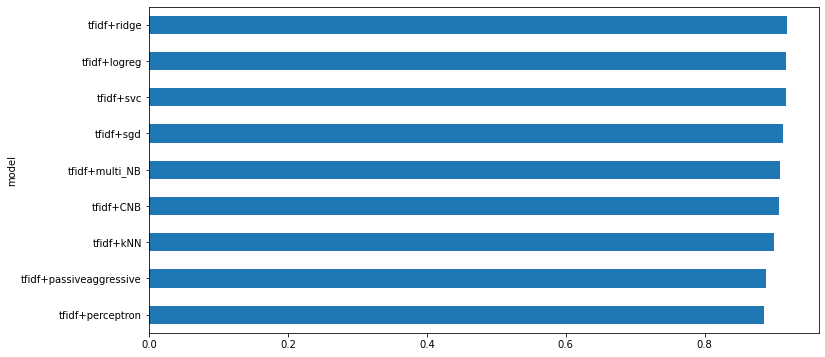

In [25]:
result_df.sort_values(by='accuracy').accuracy.plot(kind='barh', figsize=(12,6))

In [26]:
result_df.to_csv("agnews.csv")